# Problem 2

Use this notebook to write your code for problem 2. You may reuse your SGD code from last week.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The following function may be useful for loading the necessary data.

In [2]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

(100, 13)
(100,)
(40, 13)
(40,)
(30, 13)
(30,)


In [10]:
def log_loss(X, Y, w, lmbda):
    '''
    Calculate the l2 regularized logistic loss function.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.

    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''

    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
        # Calculate the logistic loss
    scores = np.dot(X, w)
    logistic_loss = np.log(1 + np.exp(-Y * scores))
    
    # Calculate the total loss
    loss = np.sum(logistic_loss)

    return loss

def l2_norm (w):
   return np.sum(w**2)

def gradient(x, y, w, lmbda, N):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.

    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.

    Output:
        The gradient of the loss with respect to x, y, and w.
    '''

    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================
    
    w = np.array(w)
    return (-y*x)/(np.exp(y*np.matmul(np.transpose(w),x))+1) + 2*lmbda/ N*w

def SGD(X, Y, w_start, eta, N_epochs, lmbda):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.

    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.

    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''

    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================
    N, D = X.shape
    w = np.array(w_start)
    for i in range(N_epochs):
      shuffle = np.random.permutation(len(X))
      X = X[shuffle]
      Y = Y[shuffle]
      for point in range(len(X)):
        w -= eta*gradient(X[point],Y[point],w,lmbda, N)
    return w

In [5]:
# PROBLEM C

train1_data = load_data('data/wine_training1.txt')
X1_train = train1_data[:, 1:]
print(X1_train.shape)
y1_train = train1_data[:, 0]
print(y1_train.shape)

train2_data = load_data('data/wine_training2.txt')
X2_train = train2_data[:, 1:]
print(X2_train.shape)
y2_train = train2_data[:, 0]
print(y2_train.shape)

validation_data = load_data('data/wine_validation.txt')
X_validation = validation_data[:, 1:]
print(X_validation.shape)
y_validation = validation_data[:, 0]
print(y_validation.shape)

# Initialize hyperparameters
lmbdas = [0.0001*5**i for i in range(15)]
N_epochs = 20000
eta = 0.0005
w_start = np.random.randn(X1_train.shape[1]+1)/ 100

# Normalize input data in order to address numerical instability issues

mean1 = np.mean(X1_train, axis=0)

std1 = np.std(X1_train, axis=0)
X1_train = np.insert((X1_train - mean1) / std1, 0, 1, axis=1)
X1_valid = np.insert((X_validation - mean1) / std1, 0, 1, axis=1)

mean2 = np.mean(X2_train, axis=0)
std2 = np.std(X2_train, axis=0)
X2_train = np.insert((X2_train - mean2) / std1, 0, 1, axis=1)
X2_valid = np.insert((X_validation - mean2) / std1, 0, 1, axis=1)


# Calculate weights using SGD
w1_arr = []
w2_arr = []

for lmbda in lmbdas:
    w_1 = SGD(X1_train, y1_train, w_start, eta, N_epochs, lmbda)
    w_2 = SGD(X2_train, y2_train, w_start, eta, N_epochs, lmbda)
    w1_arr.append(w_1)
    w2_arr.append(w_2)

# Get errors

(100, 13)
(100,)
(40, 13)
(40,)
(30, 13)
(30,)


/var/folders/xb/9_dbcvgn497b0_s4zd9vpxcm0000gn/T/ipykernel_1782/484960765.py:48: RuntimeWarning: overflow encountered in exp
  return (-y*x)/(np.exp(y*np.matmul(np.transpose(w),x))+1) + 2*lmbda/ N*w
/var/folders/xb/9_dbcvgn497b0_s4zd9vpxcm0000gn/T/ipykernel_1782/484960765.py:48: RuntimeWarning: overflow encountered in multiply
  return (-y*x)/(np.exp(y*np.matmul(np.transpose(w),x))+1) + 2*lmbda/ N*w
/var/folders/xb/9_dbcvgn497b0_s4zd9vpxcm0000gn/T/ipykernel_1782/484960765.py:48: RuntimeWarning: invalid value encountered in matmul
  return (-y*x)/(np.exp(y*np.matmul(np.transpose(w),x))+1) + 2*lmbda/ N*w


In [11]:
# Get errors
train_err_1 = [log_loss(X1_train, y1_train, w, lmbda) for w in w1_arr]
train_err_2 = [log_loss(X2_train, y2_train, w, lmbda) for w in w2_arr]

valid_err_1 = [log_loss(X1_valid, y_validation, w, lmbda) for w in w1_arr]
valid_err_2 = [log_loss(X2_valid, y_validation, w, lmbda) for w in w2_arr]

# Get l2 norm
l2_norm_1 = [l2_norm(w) for w in w1_arr]
l2_norm_2 = [l2_norm(w) for w in w2_arr]

Text(0.5, 1.0, 'Average Training error vs. different lambdas')

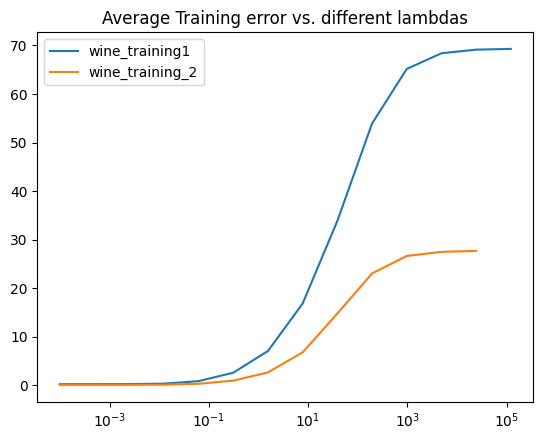

In [12]:
plt.figure()
plt.plot(lmbdas, train_err_1, label="wine_training1")
plt.plot(lmbdas, train_err_2, label="wine_training_2")
plt.xscale("log")
plt.legend()
plt.title("Average Training error vs. different lambdas")

Text(0.5, 1.0, 'Average Test error vs. different lambdas')

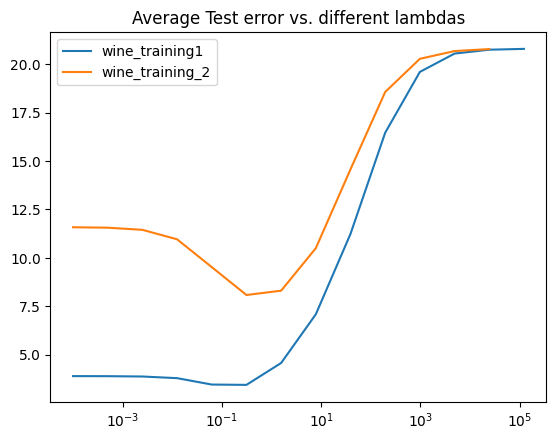

In [13]:
plt.figure()
plt.plot(lmbdas, valid_err_1, label="wine_training1")
plt.plot(lmbdas, valid_err_2, label="wine_training_2")
plt.xscale("log")
plt.legend()
plt.title("Average Test error vs. different lambdas")

Text(0.5, 1.0, 'L2-norm vs. different lambdas')

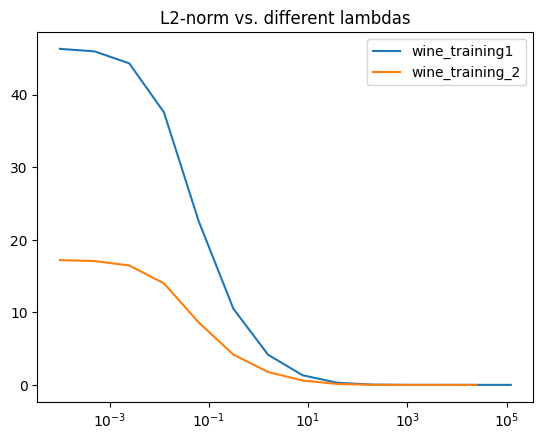

In [14]:
plt.figure()
plt.plot(lmbdas, l2_norm_1, label="wine_training1")
plt.plot(lmbdas, l2_norm_2, label="wine_training_2")
plt.xscale("log")
plt.legend()
plt.title("L2-norm vs. different lambdas")

Problem D: 
In terms of the aerage training error, both sets have similar functions curves. However, the larger set has a much higher training error as regularization increases. This is likely because as the regularizer is weighted more heavily, the model generalizes more and doesn't fit to every point. Since there are more points in the main set than the subset, the highly regularized model prediction misses more training points than the subset and incurs more error. On the other hand, the average test error is less for the larger set. This indicates that there is not enough data in the subset such that the model underfits. 

Problem E: The model overfits a bit for the lowest lambdas (< 10-1). The training error is practically zero, until it increases slightly at lambda = 10-1. However, the testing error decreases slightly at 10-1 which indicates that lambda = 10-1 helps the model generalize slightly better. After 10-1 the training and testing error increases sharply which indicates underfitting.

Problem F: The l2 norm of w decreases as lambda increases in an reversed S shape.

Problem G: I would chose lambda = 1 because it results in the lowest test error.